<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install rdkit
%pip install openpyxl
from rdkit import Chem
import os
!wget https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/AntiOx_filtering_test.xlsx #run this only once per session
!wget https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
from func import is_substruct_in

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 12.7 MB/s eta 0:00:00
--2025-04-07 07:19:23--  https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/AntiOx_filtering_test.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/AntiOx_filtering_test.xlsx [following]
--2025-04-07 07:19:24--  https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/AntiOx_filtering_test.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1653848 (1.6M) [application/octet-stream]
Saving to: ‘AntiOx_filtering_test.xlsx’

AntiOx_filte

In [2]:

df = pd.read_excel("AntiOx_filtering_test.xlsx")
df

,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,Efficacy,Phenotype-Replicate_1,Potency-Replicate_1,Efficacy-Replicate_1,Experimental Data,Target ChEMBL ID,Target Pref Name,Cell Line Target,Solubility,Solubility Level
0,AOXMO26283,CC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC...,InChI=1S/C28H26O9/c1-16(29)34-24-10-8-20(14-26...,C28H26O9,506.5,4.61,0,9,122.3,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-4.394,2
1,AOXMO26284,CCC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(=O)CC)c(...,InChI=1S/C28H30O7/c1-5-26(29)34-22-12-10-18(16...,C28H30O7,478.5,5.55,0,7,88.1,8,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-5.943,2
2,AOXMO26285,COc1cc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2...,InChI=1S/C26H26O7/c1-16(27)32-22-10-8-18(14-24...,C26H26O7,450.5,4.77,0,7,88.1,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-5.135,2
3,AOXMO26286,CC(=O)Oc1ccc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC(...,InChI=1S/C27H24O9/c1-15(28)33-23-9-5-19(13-25(...,C27H24O9,492.5,4.22,0,9,122.3,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-4.033,2
4,AOXMO26287,COc1cc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2=...,InChI=1S/C25H24O7/c1-15(26)31-21-9-5-17(13-23(...,C25H24O7,436.5,4.38,0,7,88.1,6,...,NaN,NaN,NaN,NaN,IC50 >= 100000 nM,CHEMBL3879801,NaN,NaN,-4.754,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,AOXMO04063,O=C(CC1SC(=O)NC1=O)Nc1nc(-c2ccc(Cl)cc2)cs1,InChI=1S/C14H10ClN3O3S2/c15-8-3-1-7(2-4-8)9-6-...,C14H10ClN3O3S2,367.8,3.14,2,6,88.2,4,...,NaN,NaN,NaN,NaN,EC50,CHEMBL3879801,NaN,NaN,-4.601,2
5166,AOXMO04064,O=C(CC1SC(=O)NC1=O)Nc1nc(-c2ccccc2)cs1,InChI=1S/C14H11N3O3S2/c18-11(6-10-12(19)17-14(...,C14H11N3O3S2,333.4,2.49,2,6,88.2,4,...,NaN,NaN,NaN,NaN,EC50,CHEMBL3879801,NaN,NaN,-3.802,3
5167,AOXMO19507,CN(C)CCN(CC1CCCN(C2Cc3ccccc3C2)C1)C(=O)c1cc2cc...,InChI=1S/C29H35N3O3/c1-30(2)14-15-32(28(33)26-...,C29H35N3O3,473.6,3.68,0,6,57.0,7,...,NaN,NaN,NaN,NaN,EC50,CHEMBL2362975,No relevant target,NaN,-5.046,2
5168,AOXMO30152,CCCCCCCCCCCC(=O)Nc1cc2c(cc1F)c(=O)c(C(=O)OCC)c...,InChI=1S/C26H37FN2O4/c1-4-7-8-9-10-11-12-13-14...,C26H37FN2O4,460.6,6.20,1,6,77.4,14,...,NaN,NaN,NaN,NaN,EC50,CHEMBL2362975,No relevant target,NaN,-5.419,2


In [3]:
phenol = "c1ccccc1[OH]"
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
RDLogger.DisableLog("rdApp.info")

df["standardized_smiles"] = df["SMILES"].apply(rdMolStandardize.StandardizeSmiles) #standardizing smiles

df["is_phenol"] = df["standardized_smiles"].apply(is_substruct_in, substruct_smarts = phenol) # checking if Molecule has a phenol element in it

df_is_phenol = df[df["is_phenol"] == 1]

In [4]:
print(len(df_is_phenol), len(df))
df.columns
df[["value", "unit"]] = df["Experimental Data"].str.extract(r"(?:IC50|EC50)\s*(?:[<>=]{1,2})?\s*([\d\.]+)\s*([A-Za-zμµugUG\/\.\-\·]+)") #Extracting values and units
df_is_not_na = df[df["value"].notna()]
df["value"] = df["value"].astype(float) #converting to float
len(df_is_not_na)

3048 5170


5064

In [5]:
def ug_mL_to_nM(value, MW):
  value*10**6/(MW) #(yg/mL = mg/L --> mg/mL * mol/g = mM *10**6 = nM)

['nM' 'ug.mL-' nan]


<ipython-input-6-bf6507ace77d>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[None None None ... None None None]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "value"] = df.loc[mask].apply(


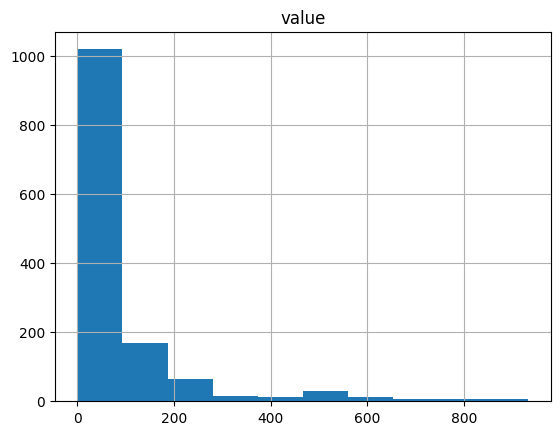

In [6]:
df[df["value"] < 1000].hist(column = "value")
unique_values = df["unit"].unique()
print(unique_values)
mask = df["unit"] == "ug.mL-"


df.loc[mask, "value"] = df.loc[mask].apply(
    lambda row: ug_mL_to_nM(row["value"], row["Molecular Weight"]),
    axis=1
)


df.loc[mask, "unit"] = "nM"